# Install the Corresponding Version

In [ ]:
#対応するversionをinstall
#TensorFlow バージョン 2.10 が動くのは、Python 3.9 (Jupiter Notebook運営設定) or Python 3.10 (Google Colaboratory運営設定)
#kerasとkeras rlは自動的に、tensorflowとmatch
!pip install tensorflow==2.10.0
!pip install gym
!pip install keras
!pip install keras-rl2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 41.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 1.6 MB/s eta 0:00:00


In [ ]:
#pip installして、runtimeを終了した後、ちゃんとintended versionは入っているかをcheck
!pip show keras
!pip show keras-rl2
!pip show tensorflow

Name: keras
Version: 2.10.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow
Name: keras-rl2
Version: 1.0.5
Summary: Deep Reinforcement Learning for Tensorflow 2 Keras
Home-page: https://github.com/wau/keras-rl2
Author: Taylor McNally
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: tensorflow
Required-by: 
Name: tensorflow
Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tenso

# OpenAIGym Basic Info

In [ ]:
#the easiest gym

import gym

#基本情報: env.reset()で環境がリセットされ、初期状態になる。その後env.step(action)で行動し、env.render()で描画します。


env = gym.make('CartPole-v0', render_mode='human')
#envとは、The basketball court, all the players, the ball, the hoop, the rules of the game, etc.
env.reset()
#env.reset() is necessary to ensure that the agent always starts from a consistent, defined starting state in each episode.
#starting a new game. The score is set back to 0-0, the clock is reset, the players are put back in their starting positions, and so on.


print(env.observation_space)
#結果: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
#The two arrays [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38] and [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]: represent the minimum and maximum possible values, respectively, for each of the four dimensions of the observation.
#(4,): the shape of the observation space, meaning each observation is a 4-dimensional vector.
#Cart Position: The cart's position along the x-axis. (The range of values is typically within (-2.4, 2.4).)
#Cart (速さ): The cart's velocity along the x-axis. (The range of values is typically within (-Inf, Inf).)
#Pole Angle: The pole's angle from the vertical. (The range of values is typically within (-41.8, 41.8) degrees.)
#Pole Velocity (速さ) At Tip: The velocity of the tip of the pole. (The range of values is typically within (-Inf, Inf).)


for _ in range(50):
    env.render()  #動きをvisualize
    action = env.action_space.sample()
    #action_spaceは、the things you can do in the game. In basketball, dribbling, passing, shooting, blocking, etc.
    #今回のOpen AI gymにおけるaction_spaceは右に進むか左に進むかなので、2通りしかactionない
    #sample()はget a random action

    observation, reward, done, info = env.step(action)


    print(observation, reward, done, info)
    #[-0.02958055 -0.7443554   0.045422    1.1290977 ] 1.0 False, {}という情報がrange分並ぶ
    #rewardは1と今回全部決まってる: In the CartPole-v0 environment, the reward is indeed always 1 for every time step the agent is able to keep the pole upright.
    #infoはenvにおけるaddiitional infoを指すけど、ほぼempty値だからignoreで良い
    #print(observation)だと1個1個のactual値が確認出来る、対してprint(observation space)だと全体のまとめ値(max-min, etc)が確認出来る

    if done == True: #done == Trueはepisode終わったらの意味
        env.reset() #episode毎に、初期化 #starting a new game. The score is set back to 0-0, the clock is reset, the players are put back in their starting positions, and so on.

env.close()

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
[-0.04904597  0.17610407  0.01626318 -0.2989193 ] 1.0 False {}
[-0.04552389  0.37099046  0.0102848  -0.58642906] 1.0 False {}
[-0.03810408  0.17572598 -0.00144378 -0.29052415] 1.0 False {}
[-0.03458956 -0.01937535 -0.00725427  0.00170307] 1.0 False {}
[-0.03497707  0.17584988 -0.0072202  -0.2932598 ] 1.0 False {}
[-0.03146007  0.37107402 -0.0130854  -0.5882111 ] 1.0 False {}
[-0.02403859  0.56637675 -0.02484962 -0.8849871 ] 1.0 False {}
[-0.01271106  0.37160087 -0.04254936 -0.60021853] 1.0 False {}
[-0.00527904  0.17709918 -0.05455374 -0.3212358 ] 1.0 False {}
[-0.00173705  0.37295386 -0.06097845 -0.6306116 ] 1.0 False {}
[ 0.00572202  0.17873341 -0.07359068 -0.35773894] 1.0 False {}
[ 0.00929669 -0.01526939 -0.08074547 -0.08913851] 1.0 False {}
[ 0.0089913   0.18091153 -0.08252823 -0.4061645 ] 1.0 False {}
[ 0.01260953  0.37710086 -0.09065152 -0.

# OpenAIGym Basic Practice

In [ ]:
import gym
import random
import matplotlib.pyplot as plt
from IPython import display


env = gym.make('CartPole-v0')
#envとは、バスケコート, プレイヤー、ボール、ルール, etc.

states = env.observation_space.shape[0]
print(states)
actions = env.action_space.n


episodes = 10
for episode in range(1, episodes+1):
#generates a sequence of numbers starting from 1 and ending at episodes+1 (exclusive of episodes+1)
#つまり、今回は[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]をoutputする

    state = env.reset()
    #0-0からgame restart
    #ちなみにenv.reset()したとしても毎回x-axis 0から始めるよというわけではない。どこから開始するかは毎回randomにてselectされる(overfit防ぐ為)

    done = False
    score = 0
    #envが持つ値はobservation, reward, done, infoだから、doneとscoreだけ別々に初期状態に設定してあげる必要性

    while not done:
        #not doneの間(done Trueになるまで)、each episodeはtrainingの場数を踏む
        #doneは、the agent fails to balance the pole, i.e., when the pole tips over too much or the cart moves off the displayの時に起こる
        #--->だからeach episodeがhow many 場数trainingしたかはvary



        #visualize
        #img = plt.imshow(env.render(mode='rgb_array'))
        #display.display(plt.gcf())
        #display.clear_output(wait=True)



        action = random.choice([0,1])
        #actionは今回右か左かの2通りしかない #0~1の値ではなく、0か1か(右か左か)
        #When action is 0, a force of -1.0 is applied to the cart causing it to move to the left
        #when action is 1, a force of +1.0 is applied to the cart causing it to move to the right.
        #だけど、どれくらい実際にx-axisに沿って動くかは、その時におけるstickの角度やpositionに左右されるから、必ずしもx-axisにおける-1 or +1かの変化ではない
        n_state, reward, done, info = env.step(action)
        score+=reward
        #print('After action {}, new state: {}, score{}、done{}'.format(action, n_state, score, done)) #⭐️action毎⭐️ #whileの中の場数毎まで細かく確認したければ、こっち
    #print('Episode:{} Score:{} State:{}'.format(episode, score, state)) #⭐️episode毎⭐️ #while後のepisode毎のまとめ最終結果だけ確認したければ、こっち


###まず、state = env.reset()とdone = Falseとscore = 0を設定してからepisode開始(全部10個)###
###not done(done False)の間、つまり、poleが倒れてdone Trueになるまで、whileの中の処理が反復される。
###-----> actionは右か左かの2通りで、それぞれ具体的にどれくらいx-axisの右左にいくかは、poleの角度etc物理原則に左右されるから必ずしもx-axisにおける+-1(右左)の動きではない
###毎回actionした結果が、print('After action {}, new state: {}, score{}、done{}'.format(action, n_state, score, done)) にてget
###done Trueになるまでactionしたepisode毎のまとめの結果が、print('Episode:{} Score:{} State:{}'.format(episode, score, state)) にてget

###rewardはopen AI gymではalways 1だけど他は違うことある
###state = env.reset()は必ずしも毎回x-axis 0地点に行くわけではない。overfittingを防ぐ為に、start地点はrandomに選ばれる

4


# **Deep Reinforcement Learning 本題**

# Create a Deep Learning Model with Keras

In [ ]:
###まず、inputとしてstateをぶち込み、outputとしてそれぞれのactionに対応するQvalueをoutputするNNを構築する###


import tensorflow as tf
from tensorflow import keras

#neural networkのlayerをbuildする時に必要
from tensorflow.keras.layers import Flatten, Dense

#agentを次のcellにてbuildする時に必要
#(こっちのcellに加えた理由は、model = build_model(states, actions)というようにmodelを定義した後に、以下をimportしようとすると、Functional' object has no attribute errorが起きる)
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
from tensorflow.keras.optimizers import Adam

states = env.observation_space.shape[0] #4
#env.observation_spaceは
#Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
#みたいな値を持つからenv.observation_space.shapeは(4,)
#だからshape[0]は4
actions = env.action_space.n #2




###⭐️Deep RLでは、stateだけをinputとしてぶち込んだら、それぞれのactionに対応するQvalueがoutputされる⭐️###
def build_model(states, actions):
    model = tf.keras.Model()

    # Input layer
    inputs = tf.keras.Input(shape=(1, states)) #後で、state dataいっぱいぶち込むから、予めdata入るようにshapeをstate dataに合わせておく

    # Flatten layer
    x = Flatten()(inputs) #denseが待っているから、1次元にする

    # Dense layers
    x = Dense(24, activation='relu')(x)
    x = Dense(24, activation='relu')(x)

    # Output layer
    outputs = Dense(actions, activation='linear')(x) #actionsは2 #右か左かの合計2通りのそれぞれactionに対応するQvalueがoutputされる

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

model = build_model(states, actions)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 4)]            0         
                                                                 
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_6 (Dense)             (None, 24)                120       
                                                                 
 dense_7 (Dense)             (None, 24)                600       
                                                                 
 dense_8 (Dense)             (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


# Build Agent With Keras-RL

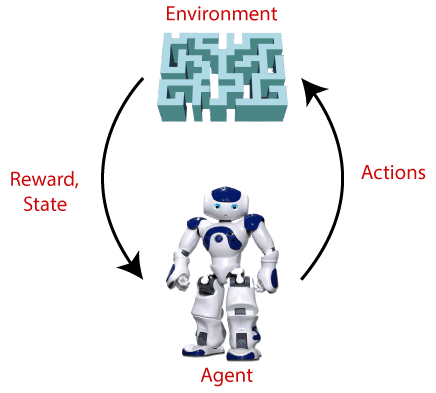

In [ ]:
###Build Agent###

policy = BoltzmannQPolicy() #BoltzmannQPolicyにてtraining進行します

###BoltzmannQPolicyとは###
#例えば、先生がある問題に正しく回答してくれる生徒をpickしたい
#学期初めだと、まだ生徒の事知らないから(temperature high)、選ぶ生徒のrandom性高い
#学期進むにつれて、テストなどによって、先生は生徒の事を知り始める(temperature drop)、より成績が悪い生徒(low energies)より成績が良い生徒(high energies)を選ぶ
#学期終わりには、先生は生徒の事を知り尽くしている(temperature low)から、almost always成績が良い人が選ばれる可能性が高い(random性低い)
#上記の例では、先生のchoiceが学期(temperature)と成績(energies)の高低に基づく(temperature低いとrandom)
#RLのcontextでは、Q-valueが成績にあたり、typically最初は全部Q-valueないからrandom性高いけど、段々action毎のQ-valueが分かってくる(temperature drops)
#そしたらRL agentはhigher Q-valueのactionのtrainingによりfocusするようになる(higher valueの方が、rewardに直接影響するから重要だと考える)

memory = SequentialMemory(limit=50000, window_length=1)
#1 of 50000 memoryは単純に、各action毎のexperience (like以下)
#{"state": [0, 1, 0, 0, 0, 0, 0, 0, 0],"action": 1,"reward": 1,"next_state":[1, 0, 0, 0, 0, 0, 0, 0, 0],"done": False}
#window_lengthは何個のこういうactionをひとつのexperienceとして記憶するかを定義。今回はwindow_lengthは1だから、毎回毎回のaction毎にひとつのexperienceをとして記憶
#board gameなどにて複数のactionでひとつの意味的stepになる時に、width_length複数という必要性が出てくる

dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
#model, memory, policy, nb_actions, etcはDQNAgent model(Keras RL default)のattributes
#nb_steps_warmup: The number of steps that the agent will take before it starts learning->These initial steps allow the agent to gather some experiences to start learning from.
#target_model_updateに関して:
#DQNのneural networkには、online modelとtarget modelがある
#online modelは頑張ってbike乗れるように成功/失敗体験を毎回update、一方、target modelはonline modelの見本的存在
#(ただ闇雲に成功/失敗を毎回updateするだけでなく、target modelの見本例を観察して活かす)
#target modelのupdateをゆっくりにすることにより、見本例がfrequently変化しないから、安定して学習出来る (目標コロコロ変わったら、学習効率悪い)
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])
#metricsは測定方法。MAE（Mean Absolute Error/平均絶対値誤差）は、真の値と予測値の差の絶対値の平均です。

# Test the Pre-trained Model

In [ ]:
import numpy as np
scores = dqn.test(env, nb_episodes=20, visualize=True)
print(np.mean(scores.history['episode_reward']))
#train前は、rewardは勿論、stepに関してもconfidentに正しく失敗せずに進められてないから、値低い
#reward: 10.000とか steps: 10とか

Testing for 20 episodes ...


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode 1: reward: 23.000, steps: 23
Episode 2: reward: 9.000, steps: 9
Episode 3: reward: 9.000, steps: 9
Episode 4: reward: 10.000, steps: 10
Episode 5: reward: 9.000, steps: 9
Episode 6: reward: 9.000, steps: 9
Episode 7: reward: 9.000, steps: 9
Episode 8: reward: 10.000, steps: 10
Episode 9: reward: 10.000, steps: 10
Episode 10: reward: 8.000, steps: 8
Episode 11: reward: 35.000, steps: 35
Episode 12: reward: 9.000, steps: 9
Episode 13: reward: 8.000, steps: 8
Episode 14: reward: 10.000, steps: 10
Episode 15: reward: 9.000, steps: 9
Episode 16: reward: 10.000, steps: 10
Episode 17: reward: 11.000, steps: 11
Episode 18: reward: 9.000, steps: 9
Episode 19: reward: 9.000, steps: 9
Episode 20: reward: 8.000, steps: 8
11.2


# Train the Model

In [ ]:
dqn.fit(env, nb_steps=50000, visualize=True, verbose=1) ###trainingします###
#envはremove出来ない bc 上で定義したenv = gym.make('CartPole-v0')だから
#verbose=1だとtraining process表示される、verbose=0だと非表示

Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 220s 22ms/step - reward: 1.0000
52 episodes - episode_reward: 188.846 [56.000, 200.000] - loss: 4.696 - mae: 38.433 - mean_q: 76.856

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 213s 21ms/step - reward: 1.0000
51 episodes - episode_reward: 198.353 [156.000, 200.000] - loss: 6.020 - mae: 37.736 - mean_q: 75.536

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 211s 21ms/step - reward: 1.0000
50 episodes - episode_reward: 199.800 [190.000, 200.000] - loss: 10.378 - mae: 40.897 - mean_q: 81.822

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 211s 21ms/step - reward: 1.0000
50 episodes - episode_reward: 200.000 [200.000, 200.000] - loss: 13.022 - mae: 42.759 - mean_q: 85.494

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 212s 21ms/step - reward:

# Test the Trained Model

In [ ]:
import numpy as np
scores = dqn.test(env, nb_episodes=20, visualize=True)
print(np.mean(scores.history['episode_reward']))
#train後は、rewardは勿論、stepに関してもconfidentに正しく失敗せずに進められてるから、値上昇

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200
200.0


# Save the Trained Model

In [ ]:
###training後のmodelを保存して使える###
dqn.save_weights('dqn_weights.h5f', overwrite=True)

#試しに、上記にてtrainingしたこと全てdelete
del model
del dqn
del env

#素材骨組みをそっくりそのまま再構築 (trainingは終わってない状態)
env = gym.make('CartPole-v0')
actions = env.action_space.n
states = env.observation_space.shape[0]
model = build_model(states, actions)
dqn = DQNAgent(model=model, memory=memory, policy=policy, nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

#ここにすでにsaveしたtraining
dqn.load_weights('dqn_weights.h5f')
dqn.test(env, nb_episodes=5, visualize=True)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Testing for 5 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
